In [2]:
from sklearn import datasets
import pandas as pd



In [3]:
iris = datasets.load_iris()
dir(iris)
#

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.frame

In [6]:
iris.target.shape

(150,)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


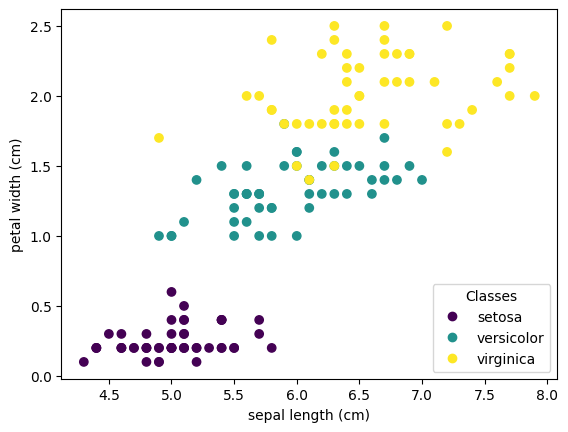

In [9]:
# we visualize the dataset by plotting a scatter plot between the sepal length and petal width
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [10]:
# we define an array X that has the features data from all rows and columns
X = iris.data[: , :]
X.shape


(150, 4)

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
# we define an array Y that has the labels that correspond to each feature array 
y = iris.target
y.shape

(150,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


In [15]:
# we will now import the Gaussian NB and fit it to find the Gaussian probabilites of each feature with respect to the target label(class)
from sklearn.naive_bayes import GaussianNB
# We establish a classifier object
clf = GaussianNB()
# fit the classifier object on the features and classes(targets) to calculate the gaussian probalbility of each feature with respect to each class
clf.fit(X_train, y_train)

GaussianNB()

In [16]:
#count of samples(rows) of each class in the training data
# The total training data is 112, so we have 35 'setosa', 39'versicolor', '38 virginica'
clf.class_count_

array([35., 39., 38.])

In [17]:
# prior probability of each class
clf.class_prior_

array([0.3125    , 0.34821429, 0.33928571])

In [18]:
# what are the class labels?
clf.classes_

array([0, 1, 2])

In [19]:
#absolute additive value to variances
clf.epsilon_

np.float64(2.9844132653061226e-09)

In [20]:
# Number of features seen during fit
clf.n_features_in_

4

In [24]:
# variance of each feature per class
clf.var_

array([[0.11056327, 0.14546939, 0.0304    , 0.01162449],
       [0.27906641, 0.09737015, 0.23495069, 0.04232742],
       [0.42607341, 0.09587258, 0.28593491, 0.08394045]])

In [25]:
# Mean of each feature per class
clf.theta_

array([[4.99714286, 3.42857143, 1.46      , 0.24571429],
       [5.88717949, 2.75128205, 4.23076923, 1.31538462],
       [6.53947368, 2.97894737, 5.53421053, 2.00263158]])

In [27]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [28]:
# we use the classifier to predict the targets or classes of the test data(X_test)
y_pred = clf.predict(X_test)

In [30]:
# We evaluate the accuracy of the model predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


#### From the above confusion matrix we see that the model correctly classified all the test data to their actual classes.  
#### From the diagonal elements in the cm, we see that 15 instances were classified as class 0, 11 instances were classified as class 1, 12 instances were classified as class 2

In [32]:
# To further evaluate the classifier
accuracy = clf.score(X, y)
print(accuracy)

0.96


In [34]:
# Another way to evaluate the classifier is by comparing between the y_test and y_pred and count the number of mismatches between the 2 arrays
n_mismatches = (y_test != y_pred).sum()
print(f"There is {n_mismatches} instances out of {len(y_test)} that are misclassified by the classifier,\n which makes the classifier accuracy equal to {(len(y_test) - n_mismatches)/len(y_test):.2f}")


There is 0 instances out of 38 that are misclassified by the classifier,
 which makes the classifier accuracy equal to 1.00
